In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [10]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
coordinates = list(lat_lngs)
coordinates

[(42.814217804729395, -100.64081198103165),
 (45.60015245205412, 74.20629663669189),
 (-16.562725539989813, -164.51223042798665),
 (48.9699332682853, 163.315871267948),
 (39.81573976261032, -87.92956105798748),
 (-21.635134468450104, -4.402041777202811),
 (31.05943128885697, 37.24581361321444),
 (-33.95426531204565, -100.36934262544308),
 (6.908158860248648, -152.69218091781804),
 (77.802936519063, 52.59506327729861),
 (30.06915170734041, -57.42198542490891),
 (-27.486566286236112, -40.092775530954526),
 (72.47005689397551, 50.344193627665504),
 (69.26850619183239, -118.07400500384249),
 (-34.29732697520282, -138.48434931182777),
 (13.244959460716089, 105.53775184660674),
 (15.09007592645412, 133.291042641476),
 (-56.902441467355125, 133.56144140729089),
 (24.57195005777517, 92.62989665253224),
 (48.6193338510042, -103.34048839438664),
 (-40.561797883463676, -97.98773387749958),
 (6.510028815671475, -131.9939191677555),
 (79.44371240963036, 117.35353993230427),
 (-30.79396925312733, -1

In [12]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

621

In [13]:
cities

['pierre',
 'saryshagan',
 'alofi',
 'petropavlovsk-kamchatskiy',
 'charleston',
 'jamestown',
 'bayir',
 'lebu',
 'hilo',
 'belushya guba',
 'saint george',
 'arraial do cabo',
 'yellowknife',
 'rikitea',
 'phumi samraong',
 'meyungs',
 'new norfolk',
 'lala',
 'williston',
 'ancud',
 'atuona',
 'saskylakh',
 'victoria',
 'malayal',
 'saint-philippe',
 'bulnes',
 'hasaki',
 'botshabelo',
 'atar',
 'mataura',
 'leningradskiy',
 'qaanaaq',
 'east london',
 'penzance',
 'kapaa',
 'carnarvon',
 'porto novo',
 'bubaque',
 'port alfred',
 'twinsburg',
 'busselton',
 'barrow',
 'hobart',
 'mar del plata',
 'puerto ayora',
 'mogadishu',
 'taolanaro',
 'gamba',
 'sao filipe',
 'bredasdorp',
 'thompson',
 'jieshi',
 'bethel',
 'grand river south east',
 'dubbo',
 'bluff',
 'warqla',
 'tasiilaq',
 'talnakh',
 'san cristobal',
 'fairbanks',
 'paciran',
 'illoqqortoormiut',
 'ondorhaan',
 'chuy',
 'hovd',
 'bereda',
 'aitape',
 'trinidad',
 'utiroa',
 'kulhudhuffushi',
 'kruisfontein',
 'kamenskoy

In [14]:
import requests
from datetime import datetime
import time
from config import weather_api_key

In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7117a2b6c736f7f908b1c52bbc0c0afd


In [16]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7117a2b6c736f7f908b1c52bbc0c0afd&q=Boston


In [17]:
city_weather = requests.get(city_url)

if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
city_weather.json()

City Weather found.


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 11.5,
  'feels_like': 2.98,
  'temp_min': 4.95,
  'temp_max': 16.11,
  'pressure': 1032,
  'humidity': 47},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 34, 'gust': 13},
 'clouds': {'all': 1},
 'dt': 1643259390,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643198609,
  'sunset': 1643233790},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
boston_data = city_weather.json()
boston_data['sys']['country']

'US'

In [19]:
date = boston_data['dt']

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 16.11 47 1 5.01


In [21]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-01-27 04:56:30'

In [22]:
city_data = []

print("Beginning Data Retrieval")
print("-"*15)

record_count = 1
set_count = 1

for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(6)

    city_url = url + "&q=" + city.replace(" ","+")

    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass


print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | pierre
Processing Record 2 of Set 1 | saryshagan
City not found. Skipping...
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 5 of Set 1 | charleston
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | bayir
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | phumi samraong
City not found. Skipping...
Processing Record 16 of Set 1 | meyungs
City not found. Skipping...
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | lala
Processing Record 19 of Set 1 | williston
Processing Record 20 of Set 1 | ancud
Processing

Processing Record 35 of Set 4 | faanui
Processing Record 36 of Set 4 | ucluelet
Processing Record 37 of Set 4 | ribeira grande
Processing Record 38 of Set 4 | kaitangata
Processing Record 39 of Set 4 | jumla
Processing Record 40 of Set 4 | naryan-mar
Processing Record 41 of Set 4 | havre-saint-pierre
Processing Record 42 of Set 4 | ravar
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | gorontalo
Processing Record 45 of Set 4 | port elizabeth
Processing Record 46 of Set 4 | jiexiu
Processing Record 47 of Set 4 | jinji
Processing Record 48 of Set 4 | inhambane
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | katsuura
Processing Record 1 of Set 5 | yakeshi
Processing Record 2 of Set 5 | filadelfia
Processing Record 3 of Set 5 | nizhnyaya pavlovka
City not found. Skipping...
Processing Record 4 of Set 5 | kaberamaido
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | mrirt
City not 

Processing Record 20 of Set 8 | kefar shemaryahu
Processing Record 21 of Set 8 | tokawal
City not found. Skipping...
Processing Record 22 of Set 8 | santiago de cao
Processing Record 23 of Set 8 | kangaatsiaq
Processing Record 24 of Set 8 | rio cuarto
Processing Record 25 of Set 8 | strezhevoy
Processing Record 26 of Set 8 | high level
Processing Record 27 of Set 8 | marondera
Processing Record 28 of Set 8 | san vicente
Processing Record 29 of Set 8 | kolda
Processing Record 30 of Set 8 | arman
Processing Record 31 of Set 8 | pangnirtung
Processing Record 32 of Set 8 | loandjili
Processing Record 33 of Set 8 | broken hill
Processing Record 34 of Set 8 | chunskiy
Processing Record 35 of Set 8 | miranda
Processing Record 36 of Set 8 | killybegs
Processing Record 37 of Set 8 | sisophon
Processing Record 38 of Set 8 | cabedelo
Processing Record 39 of Set 8 | kaeo
Processing Record 40 of Set 8 | kapoeta
Processing Record 41 of Set 8 | kavieng
Processing Record 42 of Set 8 | christchurch
Pro

Processing Record 7 of Set 12 | silva jardim
Processing Record 8 of Set 12 | fukue
Processing Record 9 of Set 12 | diego de almagro
Processing Record 10 of Set 12 | dehloran
Processing Record 11 of Set 12 | anchorage
Processing Record 12 of Set 12 | san luis
Processing Record 13 of Set 12 | hervey bay
Processing Record 14 of Set 12 | megion
Processing Record 15 of Set 12 | sovetskaya gavan
Processing Record 16 of Set 12 | mbini
Processing Record 17 of Set 12 | hede
Processing Record 18 of Set 12 | tulum
Processing Record 19 of Set 12 | magadan
Processing Record 20 of Set 12 | tsiroanomandidy
Processing Record 21 of Set 12 | mumbwa
Processing Record 22 of Set 12 | samarai
Processing Record 23 of Set 12 | tual
Processing Record 24 of Set 12 | bonavista
Processing Record 25 of Set 12 | melfort
Processing Record 26 of Set 12 | shizunai
Processing Record 27 of Set 12 | ewo
Processing Record 28 of Set 12 | anloga
Processing Record 29 of Set 12 | koundara
Processing Record 30 of Set 12 | rant

In [23]:
city_data

[{'City': 'Pierre',
  'Lat': 44.3683,
  'Lng': -100.351,
  'Max Temp': 37.27,
  'Humidity': 62,
  'Cloudiness': 28,
  'Wind Speed': 1.01,
  'Country': 'US',
  'Date': '2022-01-27 04:53:13'},
 {'City': 'Alofi',
  'Lat': -19.0595,
  'Lng': -169.9187,
  'Max Temp': 84.09,
  'Humidity': 74,
  'Cloudiness': 20,
  'Wind Speed': 10.36,
  'Country': 'NU',
  'Date': '2022-01-27 04:57:32'},
 {'City': 'Petropavlovsk-Kamchatskiy',
  'Lat': 53.0452,
  'Lng': 158.6483,
  'Max Temp': 23.59,
  'Humidity': 36,
  'Cloudiness': 75,
  'Wind Speed': 11.18,
  'Country': 'RU',
  'Date': '2022-01-27 04:57:33'},
 {'City': 'Charleston',
  'Lat': 32.7766,
  'Lng': -79.9309,
  'Max Temp': 41.02,
  'Humidity': 72,
  'Cloudiness': 75,
  'Wind Speed': 3,
  'Country': 'US',
  'Date': '2022-01-27 04:55:22'},
 {'City': 'Jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 7.72,
  'Humidity': 51,
  'Cloudiness': 60,
  'Wind Speed': 1.99,
  'Country': 'US',
  'Date': '2022-01-27 04:57:19'},
 {'City': 'Bayir',
  

In [24]:
len(city_data)

561

In [25]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pierre,44.3683,-100.3510,37.27,62,28,1.01,US,2022-01-27 04:53:13
1,Alofi,-19.0595,-169.9187,84.09,74,20,10.36,NU,2022-01-27 04:57:32
2,Petropavlovsk-Kamchatskiy,53.0452,158.6483,23.59,36,75,11.18,RU,2022-01-27 04:57:33
3,Charleston,32.7766,-79.9309,41.02,72,75,3.00,US,2022-01-27 04:55:22
4,Jamestown,42.0970,-79.2353,7.72,51,60,1.99,US,2022-01-27 04:57:19
5,Bayir,37.2687,28.2167,30.72,73,5,6.24,TR,2022-01-27 04:57:33
6,Lebu,-37.6167,-73.6500,57.29,92,4,8.68,CL,2022-01-27 04:57:33
7,Hilo,19.7297,-155.0900,72.25,89,1,1.01,US,2022-01-27 04:57:24
8,Saint George,37.1041,-113.5841,42.35,42,0,1.99,US,2022-01-27 04:55:53
9,Arraial Do Cabo,-22.9661,-42.0278,74.61,88,21,21.16,BR,2022-01-27 04:54:29


In [26]:
#Create cities.csv File
output_file = "weather_data/cities.csv"
city_data_df.to_csv(output_file, index_label="City_ID")

In [27]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

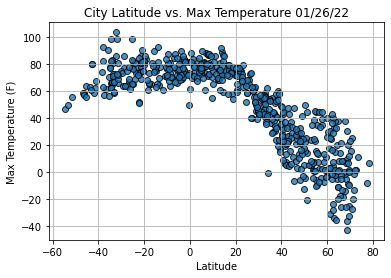

In [59]:
#City Latitude vs. Max Temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

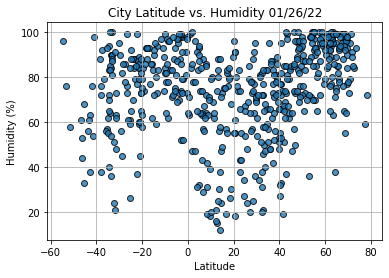

In [60]:
#City Latitude vs. Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

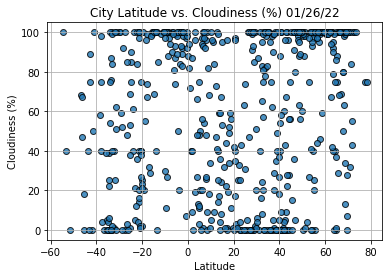

In [61]:
#City Latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")


plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

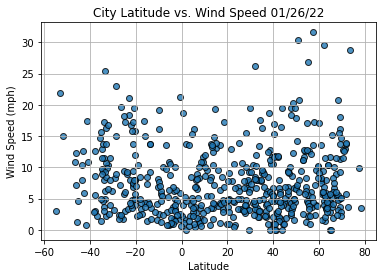

In [62]:
#City Latitude vs. Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [63]:
from scipy.stats import linregress

In [64]:
linregress(lats,max_temps)

LinregressResult(slope=-0.7530997632343887, intercept=63.65732750148517, rvalue=-0.8037223802802801, pvalue=3.795979148800669e-128, stderr=0.023580922102742395, intercept_stderr=0.9262900350237029)

In [84]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [85]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pierre,44.3683,-100.3510,37.27,62,28,1.01,US,2022-01-27 04:53:13
2,Petropavlovsk-Kamchatskiy,53.0452,158.6483,23.59,36,75,11.18,RU,2022-01-27 04:57:33
3,Charleston,32.7766,-79.9309,41.02,72,75,3.00,US,2022-01-27 04:55:22
4,Jamestown,42.0970,-79.2353,7.72,51,60,1.99,US,2022-01-27 04:57:19
5,Bayir,37.2687,28.2167,30.72,73,5,6.24,TR,2022-01-27 04:57:33
...,...,...,...,...,...,...,...,...,...
553,Pinega,64.7001,43.3936,0.72,99,86,5.68,RU,2022-01-27 05:02:31
554,Pascagoula,30.3658,-88.5561,43.03,54,4,9.33,US,2022-01-27 05:02:32
555,San Quintin,30.4833,-115.9500,57.24,72,87,7.29,MX,2022-01-27 05:02:32
556,Aksarka,66.5606,67.7975,8.56,94,100,7.54,RU,2022-01-27 05:02:32


In [86]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

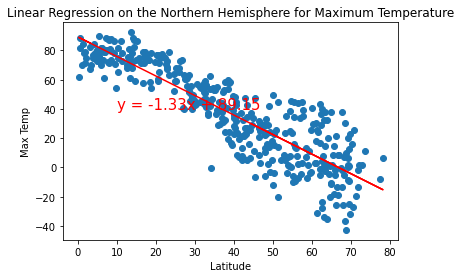

In [87]:
#Northern Max Temp linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,40))

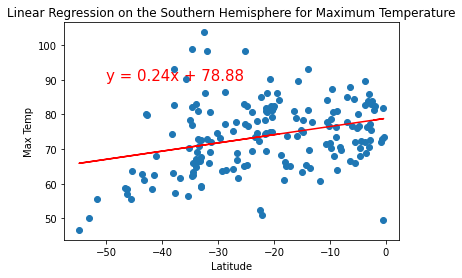

In [88]:
#Southern Max Temp linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

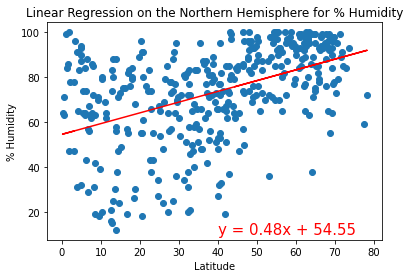

In [89]:
#Northern Humidity linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,10))

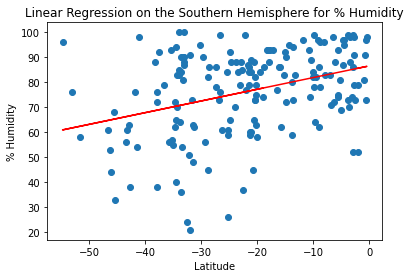

In [91]:
#Southern Humidity linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))

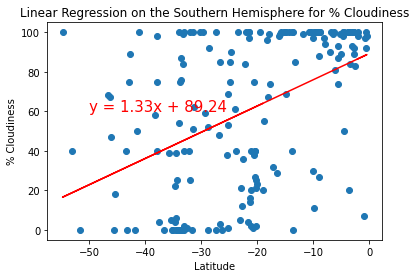

In [93]:
#Southern Cloudiness linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

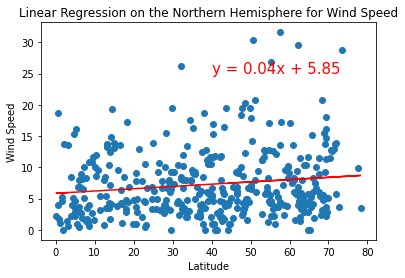

In [96]:
#Northern Wind Speed linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,25))

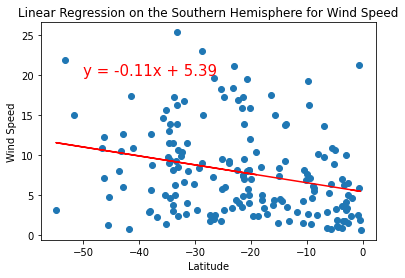

In [99]:
#Southern Wind Speed linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,20))